In [3]:
!gdown "https://drive.google.com/uc?id=1OQWfTaTaRatB8gT3sg723LRtYYKBm5tU&confirm=t" -O "train/"
!gdown "https://drive.google.com/uc?id=1MznJKj9_X4TBgnkbMWfBSBv9jyCQ6krd&confirm=t" -O "test/"

Downloading...
From: https://drive.google.com/uc?id=1OQWfTaTaRatB8gT3sg723LRtYYKBm5tU&confirm=t
To: /content/train/Heart_Attack_training_dataset.csv
100% 1.32M/1.32M [00:00<00:00, 118MB/s]
Downloading...
From: https://drive.google.com/uc?id=1MznJKj9_X4TBgnkbMWfBSBv9jyCQ6krd&confirm=t
To: /content/test/Hear_Attack_evaluation_dataset.csv
100% 131k/131k [00:00<00:00, 60.4MB/s]


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [5]:
df = pd.read_csv('train/Heart_Attack_training_dataset.csv')
df.head()

,patient_id,age,sex,chol,bp,hr,diabetes,family_history,smoking,obesity,...,sedentary_hr,income,bmi,triglycerides,phys_act_days,sleep_hr,country,continent,hemisphere,heart_attack_risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [6]:
df['sex'] = (df['sex'] == 'Male').astype(int)
df.head()

,patient_id,age,sex,chol,bp,hr,diabetes,family_history,smoking,obesity,...,sedentary_hr,income,bmi,triglycerides,phys_act_days,sleep_hr,country,continent,hemisphere,heart_attack_risk
0,BMW7812,67,1,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,1,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,0,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,1,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,1,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [7]:
cols = df.columns.tolist()
cols

['patient_id',
 'age',
 'sex',
 'chol',
 'bp',
 'hr',
 'diabetes',
 'family_history',
 'smoking',
 'obesity',
 'alcohol',
 'exercise_hr_wk',
 'diet',
 'prev_heart_prob',
 'med_use',
 'stress_lvl',
 'sedentary_hr',
 'income',
 'bmi',
 'triglycerides',
 'phys_act_days',
 'sleep_hr',
 'country',
 'continent',
 'hemisphere',
 'heart_attack_risk']

In [10]:
df = df.drop('country', axis=1)

df = pd.get_dummies(df, columns=['continent', 'hemisphere'], drop_first=True)

df = df.reindex(columns=df.columns, fill_value=0)

df.head()

,patient_id,age,sex,chol,bp,hr,diabetes,family_history,smoking,obesity,...,triglycerides,phys_act_days,sleep_hr,heart_attack_risk,continent_Asia,continent_Australia,continent_Europe,continent_North America,continent_South America,hemisphere_Southern Hemisphere
0,BMW7812,67,1,208,158/88,72,0,0,1,0,...,286,0,6,0,False,False,False,False,True,True
1,CZE1114,21,1,389,165/93,98,1,1,1,1,...,235,1,7,0,False,False,False,True,False,False
2,BNI9906,21,0,324,174/99,72,1,0,0,0,...,587,4,4,0,False,False,True,False,False,False
3,JLN3497,84,1,383,163/100,73,1,1,1,0,...,378,3,4,0,False,False,False,True,False,False
4,GFO8847,66,1,318,91/88,93,1,1,1,1,...,231,1,5,0,True,False,False,False,False,False


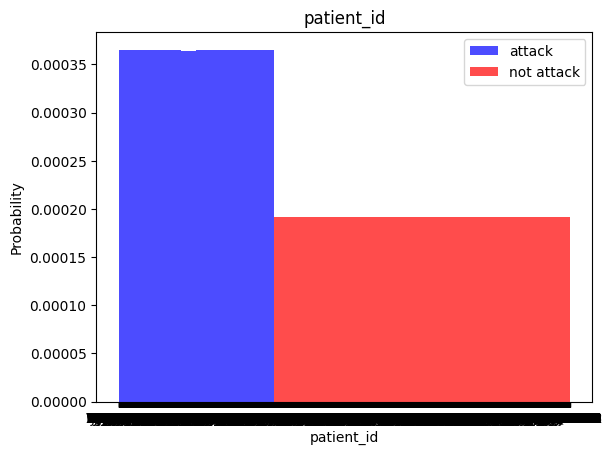

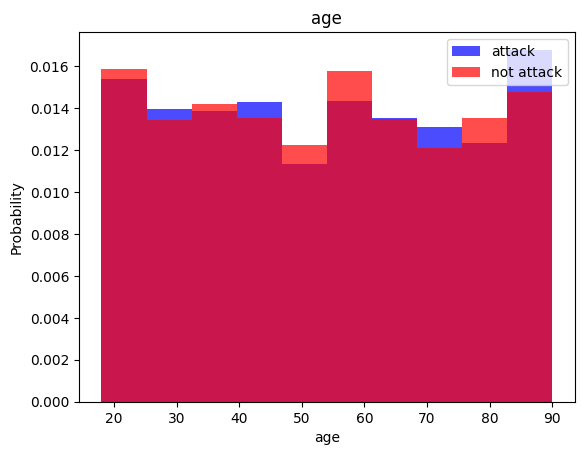

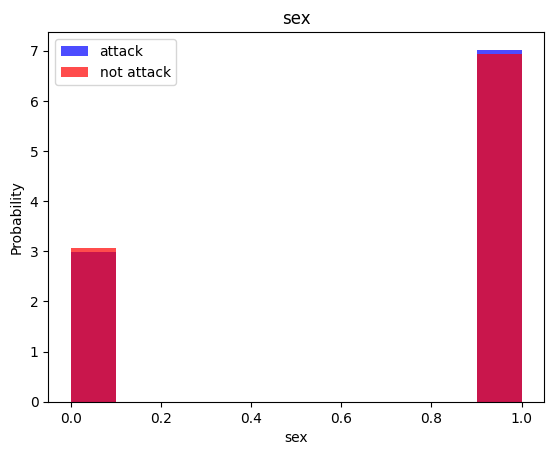

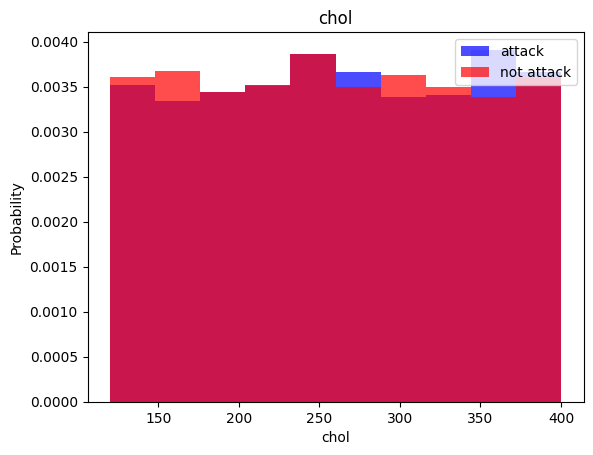

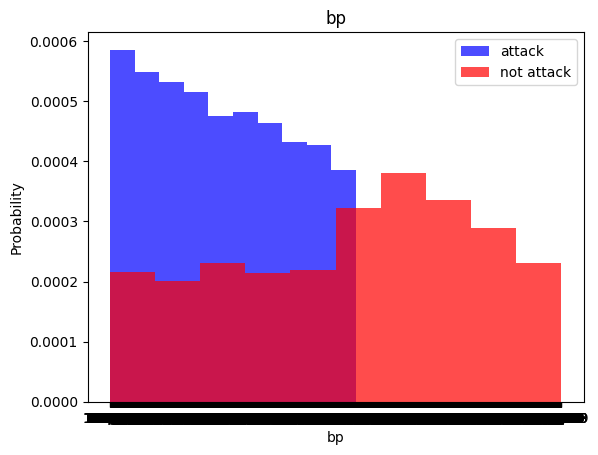

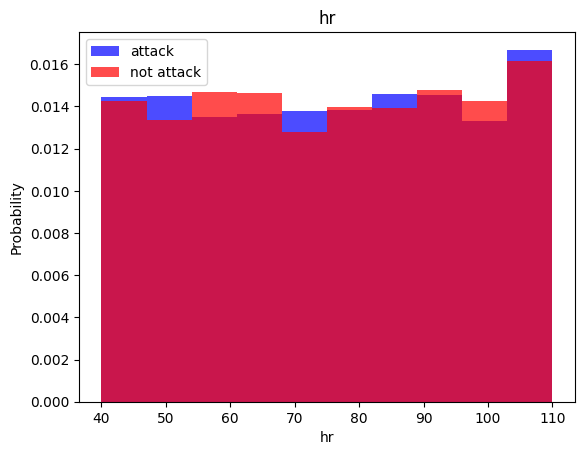

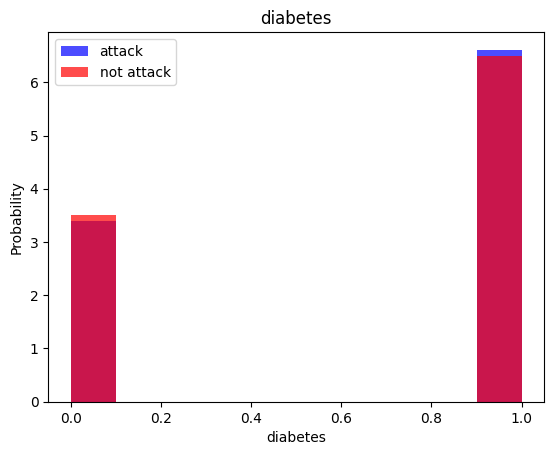

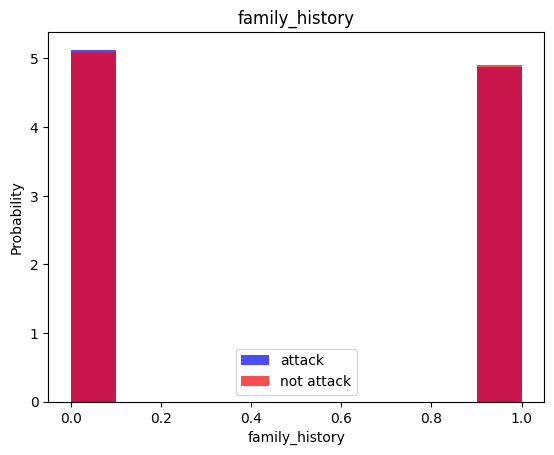

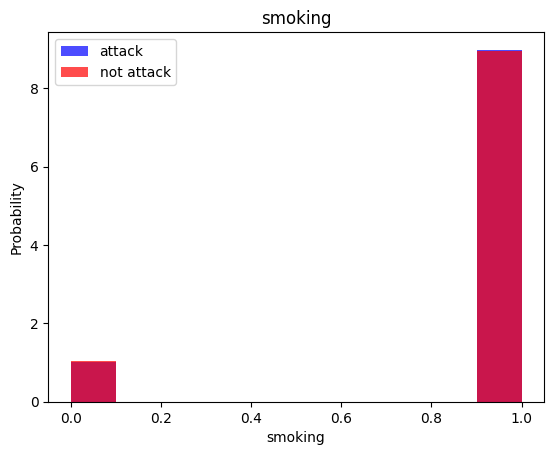

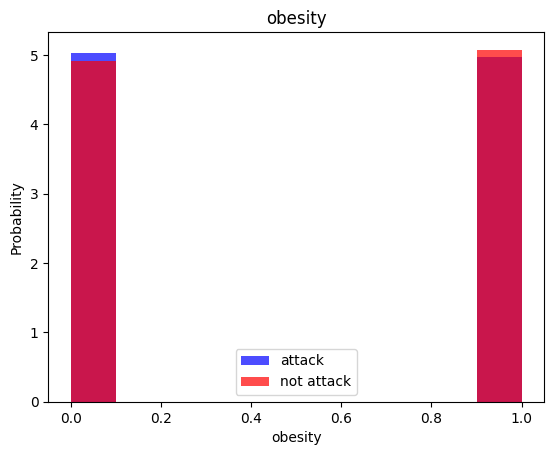

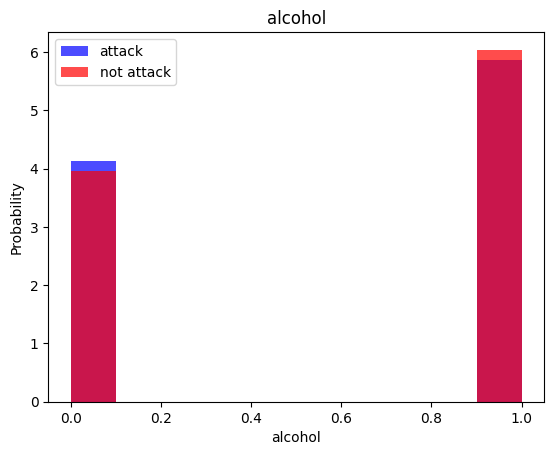

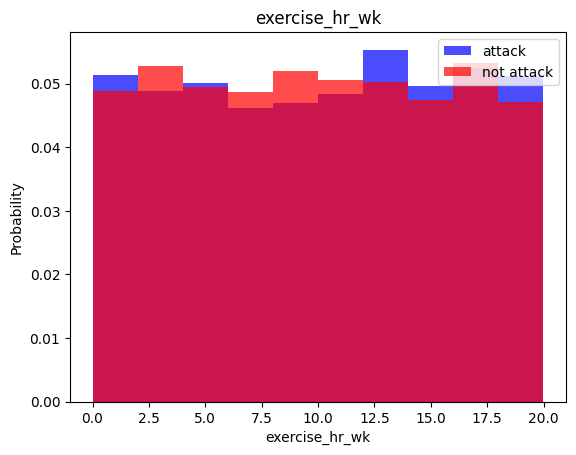

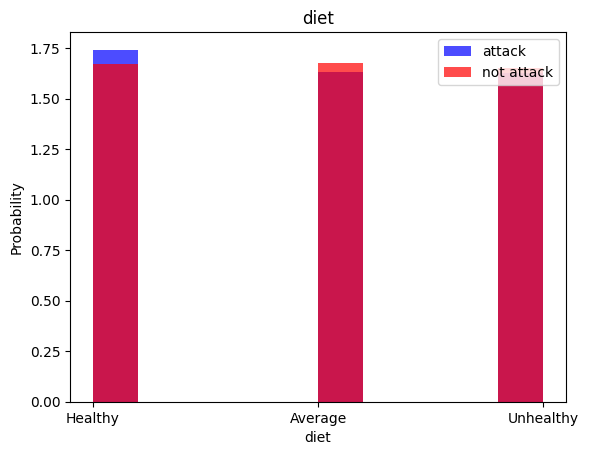

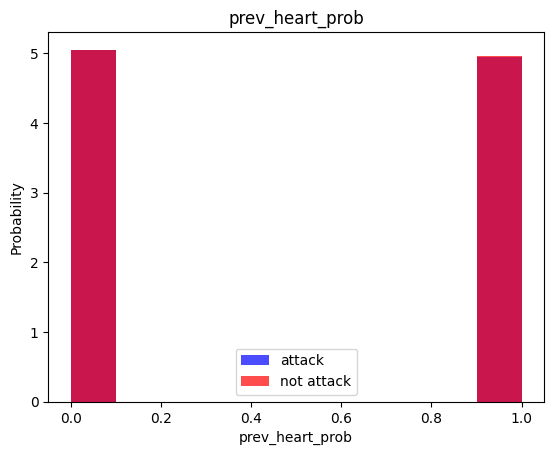

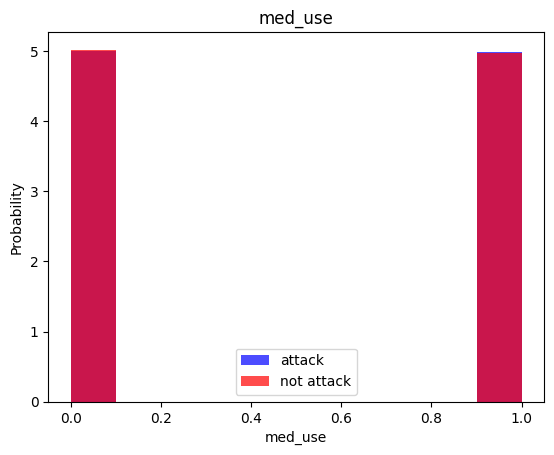

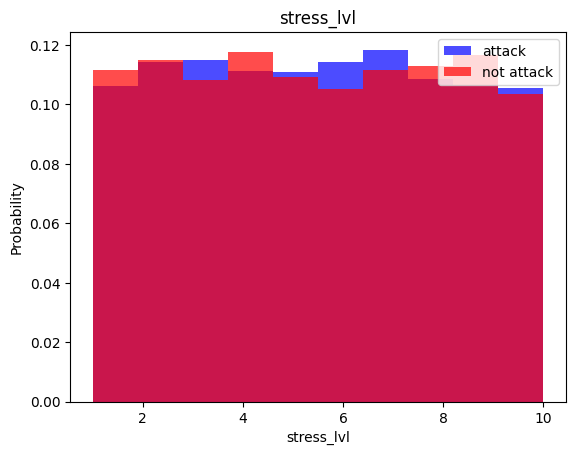

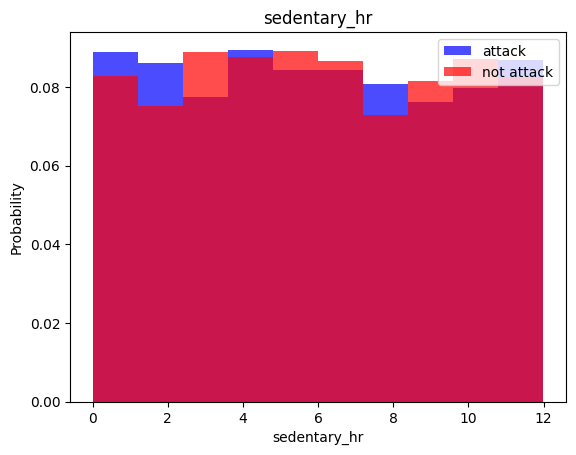

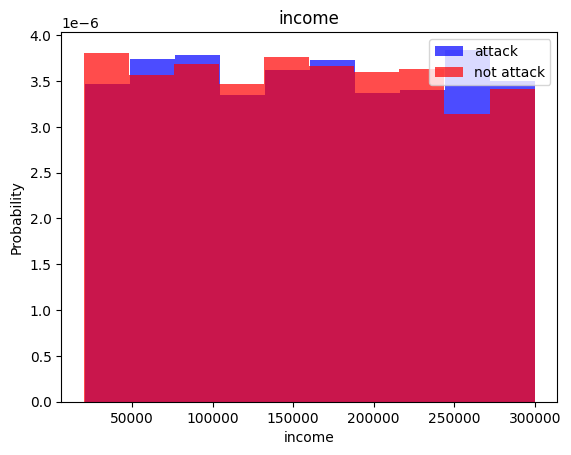

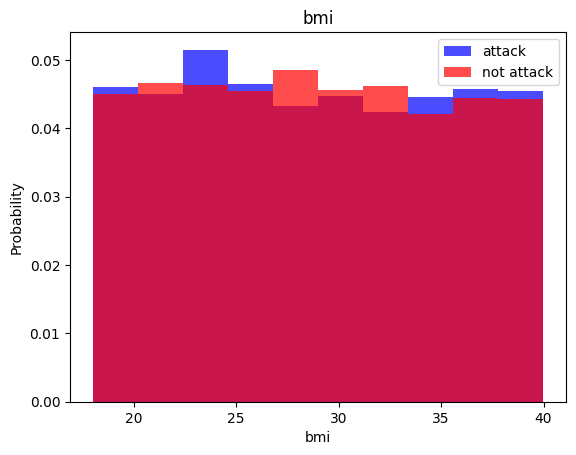

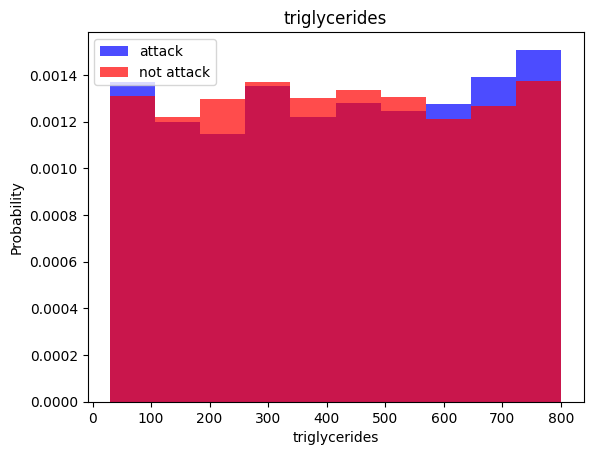

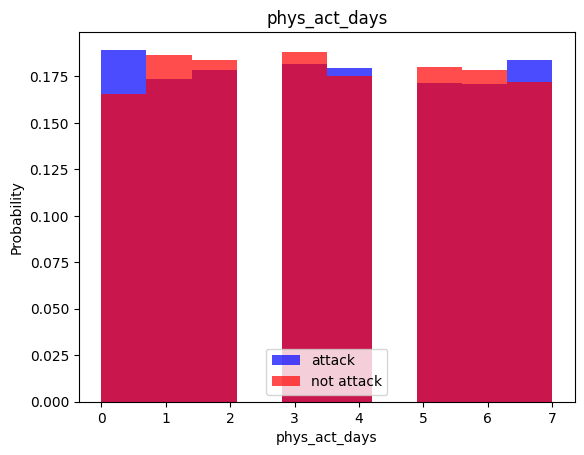

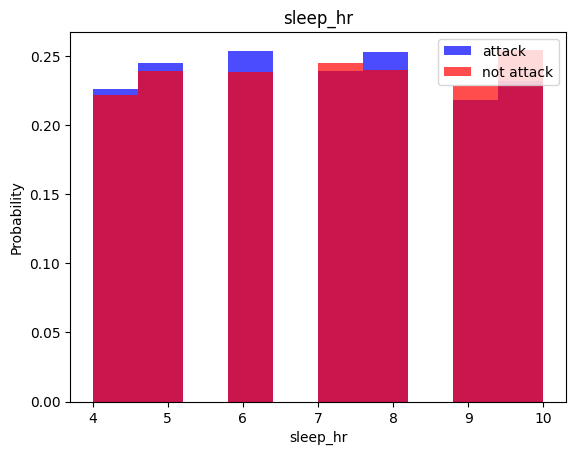

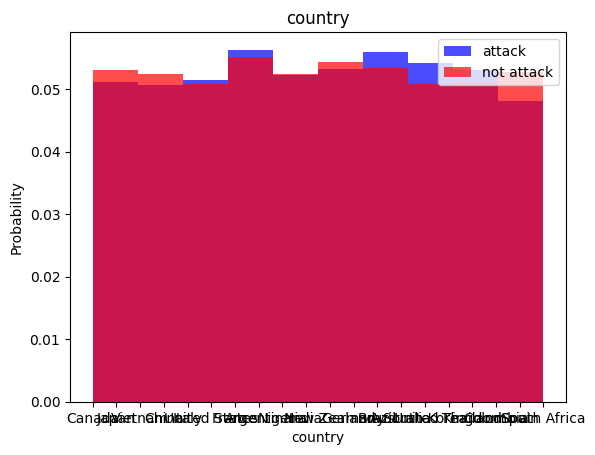

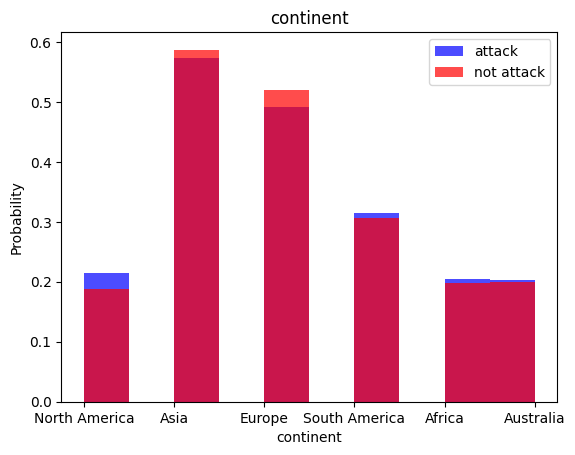

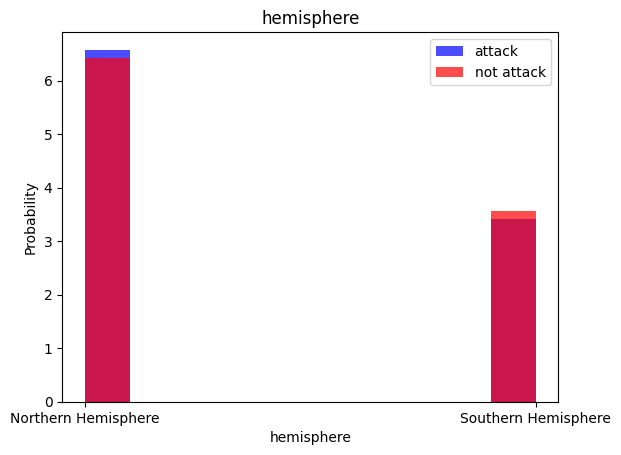

In [8]:
for label in cols[:-1]:
    plt.hist(df[df['heart_attack_risk']==1][label], color='blue', label='attack', alpha=0.7, density=True)
    plt.hist(df[df['heart_attack_risk']==0][label], color='red', label='not attack', alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel('Probability')
    plt.xlabel(label)
    plt.legend()
    plt.show()